In [5]:
from keras.datasets import mnist

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, RMSprop
from keras.utils.np_utils import to_categorical

In [9]:
data = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
type(data)

tuple

In [14]:
(x_train, y_train), (x_test, y_test) = data 

In [18]:
print('no of trainnig images = ',x_train.shape[0])
print('no of trainnig labels = ',y_train.shape[0])

no of trainnig images =  60000
no of trainnig labels =  60000


In [19]:
print('w X h of trainnig images = ',x_train.shape[1:])
print('w X h of testing images = ',x_test.shape[1:])


w X h of trainnig images =  (28, 28)
w X h of testing images =  (28, 28)


In [20]:
print('\ntraining_input___________________________: x_train.shape = ', x_train.shape)
print('labels___________________________________: y_train.shape = ', y_train.shape) 



training_input___________________________: x_train.shape =  (60000, 28, 28)
labels___________________________________: y_train.shape =  (60000,)


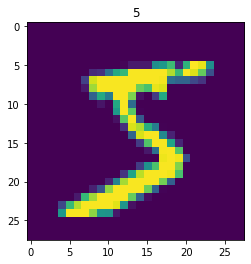

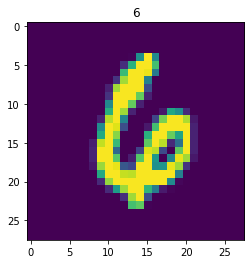

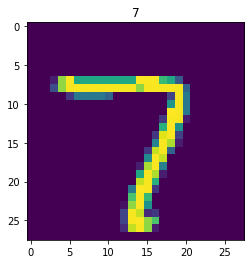

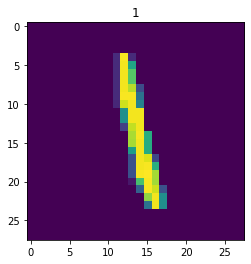

In [21]:
plt.imshow(x_train[0]) 
plt.title(y_train[0]) 
plt.show()

plt.imshow(x_train[39])
plt.title(y_train[39])
plt.show()

plt.imshow(x_train[84])
plt.title(y_train[84])
plt.show()

plt.imshow(x_train[104])
plt.title(y_train[104])
plt.show()

In [26]:
sumnum = 0
for i in range(10):  # <-- i = (0, 9)
  sumnum = sumnum + len(x_train[y_train == i])   
  print(i, '------>', len(y_train[y_train == i]))
print('total = ',sumnum) 

0 ------> 5923
1 ------> 6742
2 ------> 5958
3 ------> 6131
4 ------> 5842
5 ------> 5421
6 ------> 5918
7 ------> 6265
8 ------> 5851
9 ------> 5949
total =  60000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


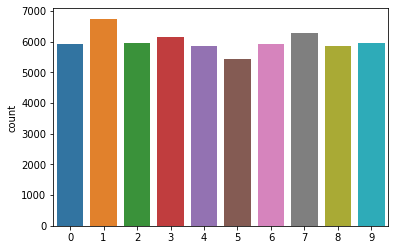

In [27]:
sns.countplot(y_train)
plt.show() 

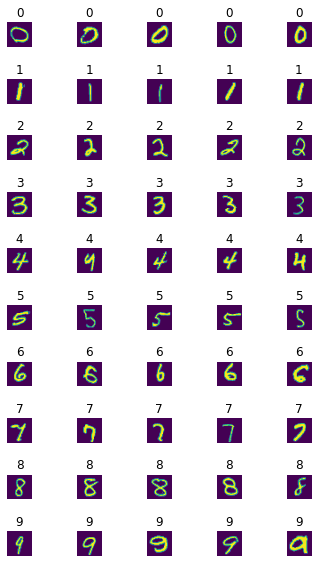

In [38]:
n_cols = 5
n_classes = 10
fig, ax = plt.subplots(nrows = n_classes, ncols = n_cols, figsize=(5,8))
fig.tight_layout()
for i in range(n_cols):
  for j in range(n_classes):
    selected_images = x_train[y_train == j]
    image = selected_images[np.random.randint(0, len(selected_images))]
    # ax[1][1].imshow(img)
    ax[j][i].imshow(image)
    ax[j][i].set_title(str(j)) 
    ax[j][i].axis('off')
 

In [41]:
n_pixel = 28 * 28
def preprocess(image):
  image = image.reshape(n_pixel) # <-- to conv the image into 1d array or to flatten the array
  image = image/255  # to convert all the values in pu/scaling
  return image
 


In [44]:
x_train = np.array(list(map(preprocess, x_train)))

x_test = np.array(list(map(preprocess, x_test)))

print(x_train.shape)
print( x_test.shape)

y_train.shape

(60000, 784)
(10000, 784)


(60000,)

In [45]:
y_train = to_categorical(y_train, n_classes) # # n_classes = len(np.unique(y_train))

y_test = to_categorical(y_test, n_classes)

In [46]:
model = Sequential()
model.add(Dense(units=222, input_dim=n_pixel, activation='sigmoid')) 
model.add(Dense(383, activation='sigmoid')) 
model.add(Dense(10, activation='softmax')) 
model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 222)               174270    
_________________________________________________________________
dense_1 (Dense)              (None, 383)               85409     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3840      
Total params: 263,519
Trainable params: 263,519
Non-trainable params: 0
_________________________________________________________________


In [47]:
h = model.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 1.8762 - accuracy: 0.3009 - val_loss: 0.4385 - val_accuracy: 0.8608
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4292 - accuracy: 0.8667 - val_loss: 0.3441 - val_accuracy: 0.8921
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3436 - accuracy: 0.8930 - val_loss: 0.2796 - val_accuracy: 0.9146
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2990 - accuracy: 0.9088 - val_loss: 0.3165 - val_accuracy: 0.9059
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2635 - accuracy: 0.9196 - val_loss: 0.2623 - val_accuracy: 0.9247
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2419 - accuracy: 0.9251 - val_loss: 0.2525 - val_accuracy: 0.9233
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2166 - accuracy: 0.9332 - val_loss: 0.2102 - val_accuracy:

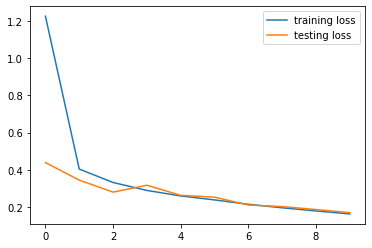

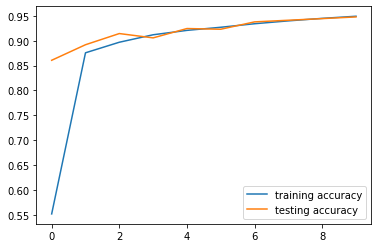

In [48]:
plt.plot(h.history['loss'], label='training loss')
plt.plot(h.history['val_loss'], label='testing loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='training accuracy')
plt.plot(h.history['val_accuracy'], label='testing accuracy')
plt.legend()
plt.show()

In [49]:
model.save('mnist_pptron.h5')


In [50]:
from google.colab import files 
files.download('mnist_pptron.h5') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>